# Capstone Project - The Battle of Neighborhoods
Import Libraries
In this section we import the libraries that will be required to process the data.

The first library is Pandas. Pandas is an open source, BSD-licensed library, providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [1]:


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import urllib.request
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium


from bs4 import BeautifulSoup
import requests
print('Libraries imported.')

Libraries imported.


In [66]:

from IPython.display import HTML
import base64
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Download and Explore Dataset
Download and Explore Dataset Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: http://datahub.johnscreekga.gov/datasets/neighborhoods-1/data

For your convenience, I downloaded the files and placed it on the server, so you can simply run a wget command and access the data. So let's go ahead and do that.

In [2]:
data = pd.read_csv (r'C:\Users\punee\OneDrive\Desktop\Coursera_Capstone\Week 4\Neighborhoods_2012b.csv',',')

data.head(200)

,the_geom,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60670812560372 41.81681377...,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157
1,MULTIPOLYGON (((-87.62760697485348 41.87437097...,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156
2,MULTIPOLYGON (((-87.66706868914602 41.88885187...,United Center,UNITED CENTER,3.252051e+07,23101.363745
3,MULTIPOLYGON (((-87.65833494805533 41.92166144...,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745
4,MULTIPOLYGON (((-87.74059567509266 41.88782316...,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351
5,MULTIPOLYGON (((-87.69540013130901 41.88818507...,Garfield Park,GARFIELD PARK,8.997607e+07,44460.919220
6,MULTIPOLYGON (((-87.72023936012896 41.86986908...,North Lawndale,NORTH LAWNDALE,8.948742e+07,44959.459663
7,MULTIPOLYGON (((-87.68739948177172 41.83480098...,Little Village,LITTLE VILLAGE,1.279983e+08,49904.040030
8,MULTIPOLYGON (((-87.62920071904188 41.84712706...,Armour Square,"ARMOUR SQUARE,CHINATOWN",1.714147e+07,24359.189625
9,MULTIPOLYGON (((-87.58565529833413 41.75150194...,Avalon Park,"AVALON PARK,CALUMET HEIGHTS",3.485274e+07,27630.822534


In [3]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(timeout=10)

C:\Users\punee\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [4]:
data_chicago=data[['PRI_NEIGH']]


# Getting Geo-Location of the Neighborhoods

In [6]:

appended_data = []
for row in data_chicago.itertuples():
     neigh=row.PRI_NEIGH+',Chicago,IL'
     
     location = geolocator.geocode(neigh)
     if location is not None:
            print (neigh)
            data_chic_latlong = {
                    'Neighborhood':row.PRI_NEIGH,
                    'Latitude':  location.latitude,
                    'Longitude':location.longitude,
                        }
            
            appended_data.append(data_chic_latlong)
# see pd.concat documentation for more info
df=pd.DataFrame(appended_data)
# write DataFrame to an excel sheet 
df.to_excel('appended.xlsx')
print(df)


Grand Boulevard,Chicago,IL
Printers Row,Chicago,IL
United Center,Chicago,IL
Humboldt Park,Chicago,IL
Garfield Park,Chicago,IL
North Lawndale,Chicago,IL
Little Village,Chicago,IL
Armour Square,Chicago,IL
Avalon Park,Chicago,IL
Burnside,Chicago,IL
Hermosa,Chicago,IL
Avondale,Chicago,IL
Logan Square,Chicago,IL
Calumet Heights,Chicago,IL
East Side,Chicago,IL
West Pullman,Chicago,IL
Garfield Ridge,Chicago,IL
New City,Chicago,IL
Englewood,Chicago,IL
Grand Crossing,Chicago,IL
Ashburn,Chicago,IL
Mount Greenwood,Chicago,IL
Morgan Park,Chicago,IL
O'Hare,Chicago,IL
Jackson Park,Chicago,IL
Loop,Chicago,IL
Pullman,Chicago,IL
Riverdale,Chicago,IL
Hegewisch,Chicago,IL
Greektown,Chicago,IL
Douglas,Chicago,IL
Museum Campus,Chicago,IL
Edgewater,Chicago,IL
Lake View,Chicago,IL
Lincoln Park,Chicago,IL
Magnificent Mile,Chicago,IL
Lincoln Square,Chicago,IL
Oakland,Chicago,IL
Grant Park,Chicago,IL
West Loop,Chicago,IL
Fuller Park,Chicago,IL
Andersonville,Chicago,IL
Woodlawn,Chicago,IL
Portage Park,Chicago,IL

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [8]:
!conda install -c conda-forge geopy --yes 

# import requests # library to handle requests
import json
import requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [9]:
address = 'Chicago, IL' 

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [10]:
map_chicago = folium.Map(location=[latitude, longitude],tiles="OpenStreetMap", zoom_start=10)


for lat, lng,  neighborhood in zip(df['Latitude'], df['Longitude'],  df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    


map_chicago

# Foursquare venues

In [152]:
import urllib
def getNearbyVenues(names, latitudes, longitudes,categoryIds='', radius=1000):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng,
                        v['name'], 
                        v['id'],
                        v['location']['lat'], 
                        v['location']['lng'],
                        
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'VenueId',               
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [160]:

FOURSQUARE_SEARCH_URL = 'https://api.foursquare.com/v2/venues/search?'
# SEARCH VENUES BY CATEGORY

# Dataframe : venue_id_recover 
# - store venue id to recover failed venues id score retrieval later if foursquare limit is exceeded when getting score.
venue_id_rcols = ['VenueID']
venue_id_recover = pd.DataFrame(columns=venue_id_rcols)

def getVenuesByCategory(names, latitudes, longitudes, categoryID, radius=500):
    global CLIENT_ID
    global CLIENT_SECRET
    global FOURSQUARE_EXPLORE_URL
    global FOURSQUARE_SEARCH_URL
    global VERSION
    global LIMIT
    venue_columns = ['Town','Town Latitude','Town Longitude','VenueID','VenueName','score','category','catID','latitude','longitude']
    venue_DF = pd.DataFrame(columns=venue_columns)
    print("[#Start getVenuesByCategory]")
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name,",",end='')
        #print('getVenuesByCategory',categoryID,name) ; # DEBUG: be quiet
        # create the API request URL
        url = '{}client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            FOURSQUARE_SEARCH_URL,CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,categoryID)
        # make the GET request
        results = requests.get(url).json()
        # Populate dataframe with the category venue results
        # Extracting JSON  data values
        
        for jsonSub in results['response']['venues']:
            #print(jsonSub)
            # JSON Results may not be in expected format or incomplete data, in that case, skip!
            ven_id = 0
            try:
                # If there are any issue with a restaurant, retry or ignore and continue
                # Get location details
                ven_id   = jsonSub['id']
                ven_cat  = jsonSub['categories'][0]['pluralName']
                ven_CID  = jsonSub['categories'][0]['id']
                ven_name = jsonSub['name']
                ven_lat  = jsonSub['location']['lat']
                ven_lng  = jsonSub['location']['lng']
                venue_DF = venue_DF.append({
                    'Town'      : name,
                    'Town Latitude' : lat,
                    'Town Longitude': lng,
                    'VenueID'   : ven_id,
                    'VenueName' : ven_name,
                    'score'     : 'nan',
                    'category'  : ven_cat,
                    'catID'     : ven_CID,
                    'latitude'  : ven_lat,
                    'longitude' : ven_lng}, ignore_index=True)
            except:
                continue
    # END OF LOOP, return.
    print("\n[#Done getVenuesByCategory]")
    return(venue_DF)

In [139]:
FOURSQUARE_SEARCH_URL = 'https://api.foursquare.com/v2/venues/search?'
# SEARCH VENUES BY CATEGORY

# Dataframe : venue_id_recover 
# - store venue id to recover failed venues id score retrieval later if foursquare limit is exceeded when getting score.
venue_id_rcols = ['VenueID','Score']
venue_id_recover = pd.DataFrame(columns=venue_id_rcols)

def getVenuesIDScore(venueID):
    global CLIENT_ID
    global CLIENT_SECRET
    global FOURSQUARE_EXPLORE_URL
    global FOURSQUARE_SEARCH_URL
    global VERSION
    global LIMIT
    global venue_id_recover
    print("[#getVenuesIDScore]")
    venID_URL = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueID,CLIENT_ID,CLIENT_SECRET,VERSION)
    print(venID_URL)
    venID_score = 0.00
    # Process results
    try:
        venID_result = requests.get(venID_URL).json()
        venID_score  = venID_result['response']['venue']['rating']
#         if "venue" in venID_result['response'].keys():
#             if "rating" in venID_result['response']['venue'].keys():
#                 venID_score  = venID_result['response']['venue']['rating']
#             print(venID_score)
#         else :
#             print("no REsponse")
    except: 
        venue_id_recover = venue_id_recover.append({'VenueID' : venueID, 'Score' : 0.0},ignore_index=True)
        return ["error",0.0]
    return ["success",venID_score]

In [77]:
LIMIT = 500 
radius = 5000 
CLIENT_ID = '2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV' # your Foursquare ID
CLIENT_SECRET = 'TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV
CLIENT_SECRET:TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO


In [13]:
neighborhood_latitude = df.loc[6, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[6, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[6, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Little Village are 41.8755616, -87.6244212.


In [14]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604&ll=41.8755616,-87.6244212&radius=5000&limit=500'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d9dcdfecad1b6002ce24e01'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Chicago',
  'headerFullLocation': 'Chicago',
  'headerLocationGranularity': 'city',
  'totalResults': 236,
  'suggestedBounds': {'ne': {'lat': 41.92056164500004,
    'lng': -87.5640985486689},
   'sw': {'lat': 41.83056155499995, 'lng': -87.6847438513311}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ae786a5f964a52019ac21e3',
       'name': 'Auditorium Theatre',
       'location': {'address': '50 E Congress Pkwy',
        'crossStreet': 'Roosevelt University',
        'lat': 41.87605807115569,
        'lng': -87.62530297973589,

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
# function that extracts the category of the venue
def get_category_Id(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['id']

In [113]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name','venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# filter the category for each row
#nearby_venues['venue.categoriesId'] = nearby_venues.apply(get_category_Id, axis=1)


# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303
1,Symphony Center (Chicago Symphony Orchestra),4adfca6df964a520777d21e3,Concert Hall,41.879275,-87.624680
2,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386
3,Grant Park,4c47533649fa9521cb1f5e62,Park,41.876626,-87.619263
4,The Art Institute of Chicago,49e9ef74f964a52011661fe3,Art Museum,41.879609,-87.623572
5,Clarence Buckingham Memorial Fountain,4aba79eef964a5207b8120e3,Fountain,41.875939,-87.619330
6,Grant Park - Butler Field,4a0e2513f964a520cb751fe3,Park,41.879600,-87.619604
7,Chicago Athletic Association,513c5272e4b04d69084816ff,Hotel,41.881625,-87.624942
8,Jazz Showcase,4b699582f964a52061a82be3,Jazz Club,41.871650,-87.628707
9,Cindy's,55669b9b498ee34e5249ea61,New American Restaurant,41.881695,-87.624600


In [153]:
categoryID ='4bf58dd8d48988d1d2941735'
categoryIDIndian='4bf58dd8d48988d10f941735'
categoryIdFood='4d4b7105d754a06374d81259'
categoryFastFood='4bf58dd8d48988d16e941735'
categoryIDMediterranean='4bf58dd8d48988d1c0941735'

#'4bf58dd8d48988d1e0931735'
chicago_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                               categoryIds=categoryIDMediterranean
                                  )

In [154]:
print(chicago_venues.shape)
chicago_venues.head()


(325, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,VenueId,Venue Latitude,Venue Longitude,Venue Category
0,Printers Row,41.873787,-87.6289,Sociale,56072920498ecac16609cdf6,41.872023,-87.630637,Tapas Restaurant
1,Printers Row,41.873787,-87.6289,I Dream of Falafel,4d7e70c89df3f04dc97bc494,41.878297,-87.625797,Mediterranean Restaurant
2,Printers Row,41.873787,-87.6289,Roti Modern Mediterranean,5a3ac170c0f163350507783b,41.878097,-87.625387,Mediterranean Restaurant
3,Printers Row,41.873787,-87.6289,I Dream of Falafel,53920176498e5e3ad1966e68,41.878559,-87.625929,Mediterranean Restaurant
4,Printers Row,41.873787,-87.6289,Olive Mediterranean Grill,599f34279e3b657736e920ec,41.876975,-87.633318,Mediterranean Restaurant


In [161]:
venue_columns = ['Town','Town Latitude','Town Longitude','VenueID','VenueName','score','category','catID','latitude','longitude']
chicago_town_venues = pd.DataFrame(columns=venue_columns)

In [162]:
# Food Venues : Restaurants, Fastfoods, Etc
# For testing

categoryID = "4bf58dd8d48988d1c0941735"

tmp = getVenuesByCategory(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                               categoryID=categoryID)
chicago_town_venues = pd.concat([chicago_town_venues,tmp], ignore_index=True)

[#Start getVenuesByCategory]
Grand Boulevard ,Printers Row ,United Center ,Humboldt Park ,Garfield Park ,North Lawndale ,Little Village ,Armour Square ,Avalon Park ,Burnside ,Hermosa ,Avondale ,Logan Square ,Calumet Heights ,East Side ,West Pullman ,Garfield Ridge ,New City ,Englewood ,Grand Crossing ,Ashburn ,Mount Greenwood ,Morgan Park ,O'Hare ,Jackson Park ,Loop ,Pullman ,Riverdale ,Hegewisch ,Greektown ,Douglas ,Museum Campus ,Edgewater ,Lake View ,Lincoln Park ,Magnificent Mile ,Lincoln Square ,Oakland ,Grant Park ,West Loop ,Fuller Park ,Andersonville ,Woodlawn ,Portage Park ,Kenwood ,Rogers Park ,Jefferson Park ,Sauganash,Forest Glen ,North Park ,Albany Park ,Irving Park ,Dunning ,West Ridge ,Uptown ,Norwood Park ,Streeterville ,South Shore ,Chatham ,South Chicago ,Roseland ,North Center ,South Deering ,Washington Park ,Millenium Park ,Near South Side ,Chinatown ,Chicago Lawn ,Auburn Gresham ,Beverly ,Washington Heights ,Edison Park ,Hyde Park ,Bucktown ,Lower West Side ,Wrigle

In [163]:
chicago_town_venues.head()
chicago_town_venues.shape

(91, 10)

In [164]:
chicago_town_venues['score'] = np.nan
chicago_town_venues

,Town,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
0,Printers Row,41.873787,-87.628900,56072920498ecac16609cdf6,Sociale,NaN,Tapas Restaurants,4bf58dd8d48988d1db931735,41.872023,-87.630637
1,Printers Row,41.873787,-87.628900,599f34279e3b657736e920ec,Olive Mediterranean Grill,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.876975,-87.633318
2,Printers Row,41.873787,-87.628900,5c114c8d2a7ab6002c9c6105,Rawabi Grill Mediterranean Restaurant,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.879632,-87.626753
3,Printers Row,41.873787,-87.628900,4c72bdf09e706dcb6da24b62,Oasis Cafe,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.876514,-87.633725
4,Printers Row,41.873787,-87.628900,4f57efd2e4b093764732d338,pitabelly,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.874176,-87.626180
5,Printers Row,41.873787,-87.628900,552e9df9498e978b40cfe38e,GRK Greek Kitchen,NaN,Greek Restaurants,4bf58dd8d48988d10e941735,41.876782,-87.633961
6,Printers Row,41.873787,-87.628900,546249fb498e931a13ce9acb,Mezza Mediterranean Grill,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.877006,-87.632437
7,United Center,41.880655,-87.674159,54947980498ecffa7199f39d,Pita Heaven,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.879314,-87.669024
8,Little Village,41.875562,-87.624421,5a3ac170c0f163350507783b,Roti Modern Mediterranean,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.878097,-87.625387
9,Little Village,41.875562,-87.624421,4d7e70c89df3f04dc97bc494,I Dream of Falafel,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.878297,-87.625797


In [172]:
# Save collected Singapore food venues by town into csv for future use.
fileName = "chicago_town_venues.Category.csv"
linkName = "IBM Storage Link:chicago_town_venues.Category.csv"
create_download_link(chicago_town_venues,linkName,fileName)

In [173]:
chicago_town_venues.head()

,Town,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
0,Printers Row,41.873787,-87.6289,56072920498ecac16609cdf6,Sociale,6.8,Tapas Restaurants,4bf58dd8d48988d1db931735,41.872023,-87.630637
1,Printers Row,41.873787,-87.6289,599f34279e3b657736e920ec,Olive Mediterranean Grill,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.876975,-87.633318
2,Printers Row,41.873787,-87.6289,5c114c8d2a7ab6002c9c6105,Rawabi Grill Mediterranean Restaurant,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.879632,-87.626753
3,Printers Row,41.873787,-87.6289,4c72bdf09e706dcb6da24b62,Oasis Cafe,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.876514,-87.633725
4,Printers Row,41.873787,-87.6289,4f57efd2e4b093764732d338,pitabelly,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.874176,-87.626180


In [171]:
score_is_NAN = len(chicago_town_venues[chicago_town_venues['score'].isna()].index.tolist())
print("Current score=NaN count=",score_is_NAN)
for idx in chicago_town_venues[chicago_town_venues['score'].isna()].index.tolist():
    venueID = chicago_town_venues.loc[idx,'VenueID']
    status,score = getVenuesIDScore(venueID)
    print(status)
    if status == "success":
        print(score)
        chicago_town_venues.loc[idx,'score'] = score
score_is_NAN = len(chicago_town_venues[chicago_town_venues['score'].isna()].index.tolist())
print("PostRun score=NaN count=",score_is_NAN)
print('Done',end='')

Current score=NaN count= 58
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/599f34279e3b657736e920ec?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/5c114c8d2a7ab6002c9c6105?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/4c72bdf09e706dcb6da24b62?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/4f57efd2e4b093764732d338?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/546249fb498e931a13ce9acb?client

error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/5c114c8d2a7ab6002c9c6105?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/4e0e186bb0fb59de67d306ac?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/507074b3e4b00d743610e36d?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/4b7f1e6bf964a520e11730e3?client_id=2SDNAYRBFVGRV00MQ0BYRMGQZ4J55BF011VXIAJYOCZI4VVV&client_secret=TPGLM2GBMFLWEMYET0FAAS0B0F0NO1MMB3IBJYHWB0AOWEMO&v=20180604
error
[#getVenuesIDScore]
https://api.foursquare.com/v2/venues/5d47248150c12d0009f623c9?client_id=2SDNAYRBFVGRV00MQ0

In [174]:
chicago_town_venues

,Town,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
0,Printers Row,41.873787,-87.628900,56072920498ecac16609cdf6,Sociale,6.8,Tapas Restaurants,4bf58dd8d48988d1db931735,41.872023,-87.630637
1,Printers Row,41.873787,-87.628900,599f34279e3b657736e920ec,Olive Mediterranean Grill,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.876975,-87.633318
2,Printers Row,41.873787,-87.628900,5c114c8d2a7ab6002c9c6105,Rawabi Grill Mediterranean Restaurant,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.879632,-87.626753
3,Printers Row,41.873787,-87.628900,4c72bdf09e706dcb6da24b62,Oasis Cafe,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.876514,-87.633725
4,Printers Row,41.873787,-87.628900,4f57efd2e4b093764732d338,pitabelly,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.874176,-87.626180
5,Printers Row,41.873787,-87.628900,552e9df9498e978b40cfe38e,GRK Greek Kitchen,7.1,Greek Restaurants,4bf58dd8d48988d10e941735,41.876782,-87.633961
6,Printers Row,41.873787,-87.628900,546249fb498e931a13ce9acb,Mezza Mediterranean Grill,NaN,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.877006,-87.632437
7,United Center,41.880655,-87.674159,54947980498ecffa7199f39d,Pita Heaven,7.9,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.879314,-87.669024
8,Little Village,41.875562,-87.624421,5a3ac170c0f163350507783b,Roti Modern Mediterranean,7.0,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.878097,-87.625387
9,Little Village,41.875562,-87.624421,4d7e70c89df3f04dc97bc494,I Dream of Falafel,7.6,Mediterranean Restaurants,4bf58dd8d48988d1c0941735,41.878297,-87.625797


In [79]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Town Latitude'], df['Town Longitude'], df['Town'], df['VenueName'], df['category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [175]:
map_chicago_med = folium.Map(location=[latitude, longitude], zoom_start=5)
addToMap(chicago_town_venues, 'red', map_chicago_med)

map_chicago_med

In [176]:
chicago_town_venues.groupby('Town').count()

,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
Town,,,,,,,,,
Albany Park,1,1,1,1,0,1,1,1,1
Andersonville,2,2,2,2,2,2,2,2,2
Belmont Cragin,2,2,2,2,0,2,2,2,2
Boystown,5,5,5,5,0,5,5,5,5
Bridgeport,1,1,1,1,0,1,1,1,1
Bucktown,3,3,3,3,2,3,3,3,3
East Village,8,8,8,8,3,8,8,8,8
Gold Coast,1,1,1,1,0,1,1,1,1
Grant Park,6,6,6,6,3,6,6,6,6


In [177]:

# one hot encoding
chicago_onehot = pd.get_dummies(chicago_town_venues[['category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_town_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighborhood,Falafel Restaurants,Food Stands,Greek Restaurants,Mediterranean Restaurants,Middle Eastern Restaurants,Moroccan Restaurants,Tapas Restaurants
0,Printers Row,0,0,0,0,0,0,1
1,Printers Row,0,0,0,1,0,0,0
2,Printers Row,0,0,0,1,0,0,0
3,Printers Row,0,0,0,1,0,0,0
4,Printers Row,0,0,0,1,0,0,0


In [178]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,Falafel Restaurants,Food Stands,Greek Restaurants,Mediterranean Restaurants,Middle Eastern Restaurants,Moroccan Restaurants,Tapas Restaurants
0,Albany Park,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
1,Andersonville,0.000000,0.000000,0.000000,0.500000,0.500000,0.0,0.000000
2,Belmont Cragin,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3,Boystown,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
4,Bridgeport,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
5,Bucktown,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.000000
6,East Village,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
7,Gold Coast,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
8,Grant Park,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
9,Greektown,0.250000,0.000000,0.000000,0.500000,0.250000,0.0,0.000000


In [179]:
num_top_venues = 10

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                        venue  freq
0   Mediterranean Restaurants   1.0
1         Falafel Restaurants   0.0
2                 Food Stands   0.0
3           Greek Restaurants   0.0
4  Middle Eastern Restaurants   0.0
5        Moroccan Restaurants   0.0
6           Tapas Restaurants   0.0


----Andersonville----
                        venue  freq
0   Mediterranean Restaurants   0.5
1  Middle Eastern Restaurants   0.5
2         Falafel Restaurants   0.0
3                 Food Stands   0.0
4           Greek Restaurants   0.0
5        Moroccan Restaurants   0.0
6           Tapas Restaurants   0.0


----Belmont Cragin----
                        venue  freq
0   Mediterranean Restaurants   1.0
1         Falafel Restaurants   0.0
2                 Food Stands   0.0
3           Greek Restaurants   0.0
4  Middle Eastern Restaurants   0.0
5        Moroccan Restaurants   0.0
6           Tapas Restaurants   0.0


----Boystown----
                        venue  freq
0   Mediterr

In [180]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [225]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Albany Park,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
1,Andersonville,Middle Eastern Restaurants,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
2,Belmont Cragin,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
3,Boystown,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
4,Bridgeport,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants


In [226]:
# set number of clusters
kclusters = 5

chicogo_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicogo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 0, 3, 0, 0, 0, 2])

In [227]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



In [228]:
chicago_merged = df
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged.head()

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,41.813923,-87.617272,Grand Boulevard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.873787,-87.628900,Printers Row,4.0,Mediterranean Restaurants,Tapas Restaurants,Greek Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Food Stands,Falafel Restaurants
2,41.880655,-87.674159,United Center,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
3,41.900828,-87.723959,Humboldt Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41.882088,-87.715917,Garfield Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
chicago_merged=chicago_merged.dropna()
chicago_merged

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,41.873787,-87.628900,Printers Row,4.0,Mediterranean Restaurants,Tapas Restaurants,Greek Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Food Stands,Falafel Restaurants
2,41.880655,-87.674159,United Center,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
6,41.875562,-87.624421,Little Village,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
23,41.973101,-87.906768,O'Hare,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
25,41.875562,-87.624421,Loop,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
29,41.878445,-87.646932,Greektown,2.0,Mediterranean Restaurants,Middle Eastern Restaurants,Falafel Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands
34,41.940298,-87.638117,Lincoln Park,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
35,41.894523,-87.624228,Magnificent Mile,2.0,Mediterranean Restaurants,Middle Eastern Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
36,41.975990,-87.689616,Lincoln Square,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
38,41.876295,-87.619271,Grant Park,0.0,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants


In [232]:
chicago_merged.dtypes

Latitude                 float64
Longitude                float64
Neighborhood              object
Cluster Labels           float64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
dtype: object

In [233]:
chicago_merged['Cluster Labels'] = chicago_merged['Cluster Labels'].astype(int)

In [240]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [235]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[2] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
2,United Center,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
6,Little Village,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
23,O'Hare,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
25,Loop,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
34,Lincoln Park,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
36,Lincoln Square,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
38,Grant Park,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
39,West Loop,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
49,Albany Park,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
52,West Ridge,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants


In [236]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[2] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
46,Jefferson Park,Moroccan Restaurants,Tapas Restaurants,Middle Eastern Restaurants,Mediterranean Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants


In [237]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[2] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
29,Greektown,Mediterranean Restaurants,Middle Eastern Restaurants,Falafel Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands
35,Magnificent Mile,Mediterranean Restaurants,Middle Eastern Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
41,Andersonville,Middle Eastern Restaurants,Mediterranean Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants
55,Streeterville,Mediterranean Restaurants,Middle Eastern Restaurants,Tapas Restaurants,Moroccan Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants


In [238]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[2] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
72,Bucktown,Greek Restaurants,Food Stands,Falafel Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Mediterranean Restaurants


In [239]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[2] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,Printers Row,Mediterranean Restaurants,Tapas Restaurants,Greek Restaurants,Moroccan Restaurants,Middle Eastern Restaurants,Food Stands,Falafel Restaurants
85,Wicker Park,Mediterranean Restaurants,Greek Restaurants,Food Stands,Falafel Restaurants,Tapas Restaurants,Moroccan Restaurants,Middle Eastern Restaurants


In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Scatter Plot of Top venues in "Town Latitude" and Score')

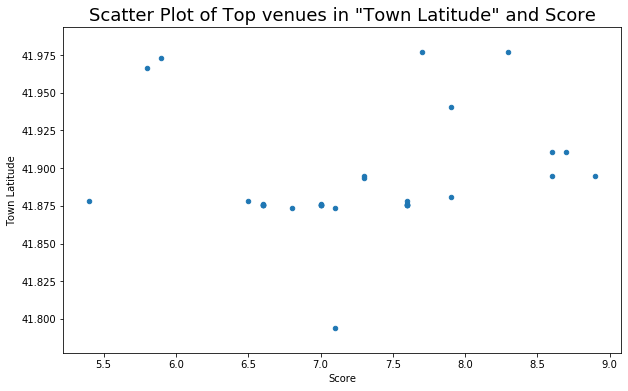

In [201]:
chicago_town_venues.plot.scatter('score', 'Town Latitude', figsize=(10,6))
#singapore_town_venues.plot.scatter('score', 'latitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Town Latitude')
plt.title('Scatter Plot of Top venues in "Town Latitude" and Score', loc='center', fontsize=18)

Text(0.5, 1.0, 'Scatter Plot of Top venues in "Town Longitude" and Score')

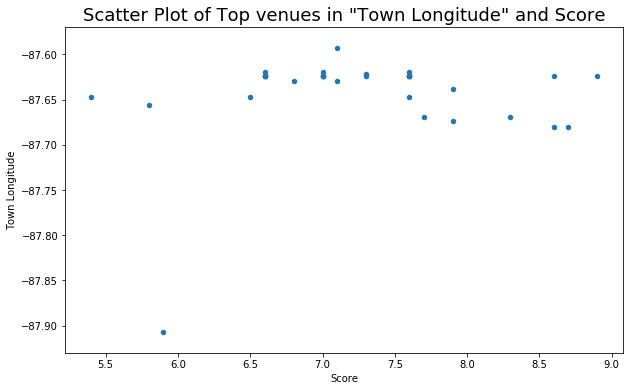

In [202]:
chicago_town_venues.plot.scatter('score', 'Town Longitude', figsize=(10,6))
#singapore_town_venues.plot.scatter('score', 'latitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Town Longitude')
plt.title('Scatter Plot of Top venues in "Town Longitude" and Score', loc='center', fontsize=18)